# Author - Olivia Boise

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [31]:
data = pd.read_csv('titanic.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [30]:
df = pd.DataFrame(data)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
col_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]
df = df.reindex(columns = col_names)
df['Sex'] = np.where((df.Sex == 'female'),0,df.Sex)
df['Sex'] = np.where((df.Sex == 'male'),1,df.Sex)
df['Sex'] = df['Sex'].astype(int)
df1 = df.head(5)
print(df1)
print(df1.dtypes)

   Pclass  Sex   Age  SibSp  Parch     Fare  Survived
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         1
3       1    0  35.0      1      0  53.1000         1
4       3    1  35.0      0      0   8.0500         0
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object


([<matplotlib.axis.XTick at 0x7fb9bfc16580>,
 [Text(0.0, 0, 'Perished'), Text(0.4, 0, 'Survived')])

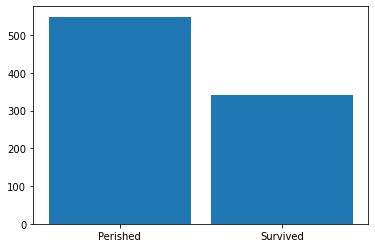

In [40]:
df['Survived'].value_counts()
counts = df['Survived'].value_counts()
w = .35
plt.bar(x=[0,.4], height=counts, width=w)
plt.xticks([0,.4], ("Perished", "Survived"))

In [43]:
print("Mean of Pclass: ", df['Pclass'].mean())
print("Mean of Sex: ", df['Sex'].mean())
print("Mean of Age: ", df['Sex'].mean())
print("Mean of SibSp: ", df['Sex'].mean())
print("Mean of Parch: ", df['Sex'].mean())
print("Mean of Fare: ", df['Sex'].mean())

Mean of Pclass:  2.308641975308642
Mean of Sex:  0.6475869809203143
Mean of Age:  0.6475869809203143
Mean of SibSp:  0.6475869809203143
Mean of Parch:  0.6475869809203143
Mean of Fare:  0.6475869809203143


In [45]:
avgs = df.groupby(df['Survived']).mean()
print(avgs)

            Pclass       Sex        Age     SibSp     Parch       Fare
Survived                                                              
0         2.531876  0.852459  30.626179  0.553734  0.329690  22.117887
1         1.950292  0.318713  28.343690  0.473684  0.464912  48.395408


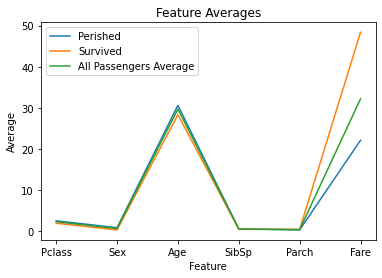

In [72]:
plt.plot(avgs.iloc[0], label = "Perished")
plt.plot(avgs.iloc[1], label = "Survived")
all_pass = [df['Pclass'].mean(), df['Sex'].mean(),df['Age'].mean(),df['SibSp'].mean(),df['Parch'].mean(),df['Fare'].mean()]
plt.plot(all_pass, label = "All Passengers Average")
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Average")
plt.legend()
plt.show()

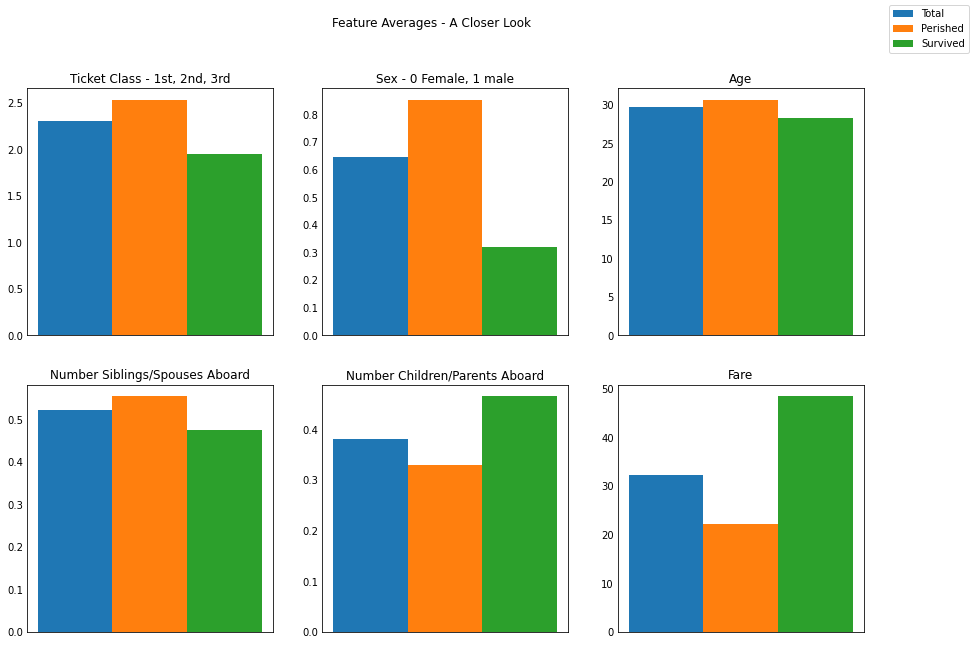

In [111]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

plt.setp(ax[0,0].get_xticklabels(), visible=False)
ax[0,0].tick_params(axis='both', which='both', length=0)
ax[0,0].bar(x=[0], height=all_pass[0], width=0.2, label="Total")
ax[0,0].bar(x=[0.2], height=avgs.iloc[0,0], width=0.2, label="Perished")
ax[0,0].bar(x=[0.4], height=avgs.iloc[1,0], width=0.2, label="Survived")
ax[0,0].set_title("Ticket Class - 1st, 2nd, 3rd")

plt.setp(ax[0,1].get_xticklabels(), visible=False)
ax[0,1].tick_params(axis='both', which='both', length=0)
ax[0,1].bar(x=[0], height=all_pass[1], width=0.2)
ax[0,1].bar(x=[0.2], height=avgs.iloc[0,1], width=0.2)
ax[0,1].bar(x=[0.4], height=avgs.iloc[1,1], width=0.2)
ax[0,1].set_title("Sex - 0 Female, 1 male")

plt.setp(ax[0,2].get_xticklabels(), visible=False)
ax[0,2].tick_params(axis='both', which='both', length=0)
ax[0,2].bar(x=[0], height=all_pass[2], width=0.2)
ax[0,2].bar(x=[0.2], height=avgs.iloc[0,2], width=0.2)
ax[0,2].bar(x=[0.4], height=avgs.iloc[1,2], width=0.2)
ax[0,2].set_title("Age")

plt.setp(ax[1,0].get_xticklabels(), visible=False)
ax[1,0].tick_params(axis='both', which='both', length=0)
ax[1,0].bar(x=[0], height=all_pass[3], width=0.2)
ax[1,0].bar(x=[0.2], height=avgs.iloc[0,3], width=0.2)
ax[1,0].bar(x=[0.4], height=avgs.iloc[1,3], width=0.2)
ax[1,0].set_title("Number Siblings/Spouses Aboard")

plt.setp(ax[1,1].get_xticklabels(), visible=False)
ax[1,1].tick_params(axis='both', which='both', length=0)
ax[1,1].bar(x=[0], height=all_pass[4], width=0.2)
ax[1,1].bar(x=[0.2], height=avgs.iloc[0,4], width=0.2)
ax[1,1].bar(x=[0.4], height=avgs.iloc[1,4], width=0.2)
ax[1,1].set_title("Number Children/Parents Aboard")

plt.setp(ax[1,2].get_xticklabels(), visible=False)
ax[1,2].tick_params(axis='both', which='both', length=0)
ax[1,2].bar(x=[0], height=all_pass[5], width=0.2)
ax[1,2].bar(x=[0.2], height=avgs.iloc[0,5], width=0.2)
ax[1,2].bar(x=[0.4], height=avgs.iloc[1,5], width=0.2)
ax[1,2].set_title("Fare")

fig.suptitle("Feature Averages - A Closer Look")
fig.legend()

In [112]:
correlations = df.corr()
correlations = correlations['Survived']
print(correlations)

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64


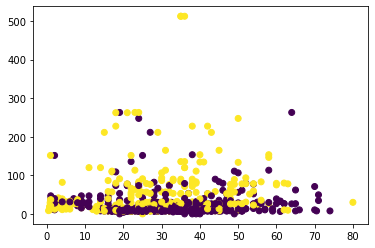

In [115]:
plt.scatter(x=df['Age'], y=df['Fare'], c=df['Survived'])